<a href="https://colab.research.google.com/github/anshudhanshu/IPL-Dataset-Analysis/blob/main/Sudhanshu_Rawat_Team_3_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

### Objective:-
* To find total number of teams in IPL
* To find the team that won maximum number of matches
* To find the most successfull player in IPL
* To find the city that hosted most IPL matches
* To find the venue where most of the IPL matches were hosted
* To determine if toss decision may affect the winning chance
* To find the biggest defeat in IPL 
* To find the biggest victory in IPL
* To find the teams That played most number of times against eachother 


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Dat/'
file_name = 'Copy of matches.csv'
ipl_matches = pd.read_csv(file_path+file_name)

In [4]:
ipl_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
ipl_matches.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [6]:
ipl_matches.shape

(756, 18)

**There are 756 rows that means total 756 IPL matches held.**

In [7]:
ipl_matches.Season.unique().tolist()

['IPL-2017',
 'IPL-2008',
 'IPL-2009',
 'IPL-2010',
 'IPL-2011',
 'IPL-2012',
 'IPL-2013',
 'IPL-2014',
 'IPL-2015',
 'IPL-2016',
 'IPL-2018',
 'IPL-2019']

In [8]:
len(ipl_matches.Season.unique().tolist())

12

**There are total 12 Season of IPL matches in this dataset from 2008 to 2019**

In [10]:
list(ipl_matches.columns)

['id',
 'Season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [11]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
print(ipl_matches.team1.unique().tolist())
len(ipl_matches.team1.unique().tolist())

['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']


15

**There are total 15 teams playing in IPL matches**

In [ ]:
ipl_matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


### Observations
* The biggest victory, when team choosen for batting first, was from margin of 146 run and when team decided to field first, was from 10 wickets
* 75% of team that decided to bat first won by margin of 19 run.
* 75% of teams that decided to field first won by 6 wickets.
* 25% of teams whether they decided to bat first or field first got either tie result or no result.

In [ ]:
ipl_matches.describe(include='object')

,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2,umpire3
count,756,749,756,756,756,756,756,756,752,752,756,754,754,119
unique,12,32,546,15,15,15,2,3,15,226,41,61,65,25
top,IPL-2013,Mumbai,01-05-2017,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,Mumbai Indians,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,O Nandan
freq,76,101,2,101,95,98,463,743,109,21,77,73,57,10


### Observations
* There are total 12 IPL season from 2008 to 2019 and the most number of IPL matches were played in `IPL-2013` season.
* Mumbai city hosted the maximum number of IPL matches.
* The most frequent `toss_winner` team was Mumbai Indians
* Most of the teams that won the toss decided to field first
* Mumbai Indians won the IPL matches maximum number of times
* The player who got `player_of_match` maximum number of times was CH Gayle.
* Eden Gardens stadium hosted maximum number of IPL matches from 2008 to 2019


### Dealing with NaN values

In [ ]:
ipl_matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

If we observe the output we can see that the feature umpire3 has significant number of NaN values 

In [ ]:
ipl_matches['umpire3'].to_numpy().reshape(1,-1)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan

It won't be good idea to impute these NaN values so we can drop the column umpire3

In [ ]:
ipl_matches.drop('umpire3',axis=1, inplace = True)

In [ ]:
ipl_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
ipl_matches.winner.mode()

0    Mumbai Indians
dtype: object

## Teams with maximum victories in each season of IPL

In [37]:
wins_per_season = ipl_matches[['Season','winner']].groupby('Season')
wins_per_season=pd.DataFrame(wins_per_season['winner'].value_counts())
wins_per_season.rename(columns = {'winner':'count_of_winner'},inplace = True)
wins_per_season = wins_per_season.reset_index()
wins_per_season

,Season,winner,count_of_winner
0,IPL-2008,Rajasthan Royals,13
1,IPL-2008,Kings XI Punjab,10
2,IPL-2008,Chennai Super Kings,9
3,IPL-2008,Delhi Daredevils,7
4,IPL-2008,Mumbai Indians,7
...,...,...,...
95,IPL-2019,Kings XI Punjab,6
96,IPL-2019,Kolkata Knight Riders,6
97,IPL-2019,Sunrisers Hyderabad,6
98,IPL-2019,Rajasthan Royals,5


will do it later

### City that hosted most number of IPL matches

In [54]:
city_counts = ipl_matches['city'].value_counts().reset_index()

In [55]:
city_counts.rename(columns={'index':'city','city':'no_of_matches'}, inplace = True)
city_counts

,city,no_of_matches
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


Now let us visualize them using bar plot

Text(0.5, 1.0, 'IPL Cities')

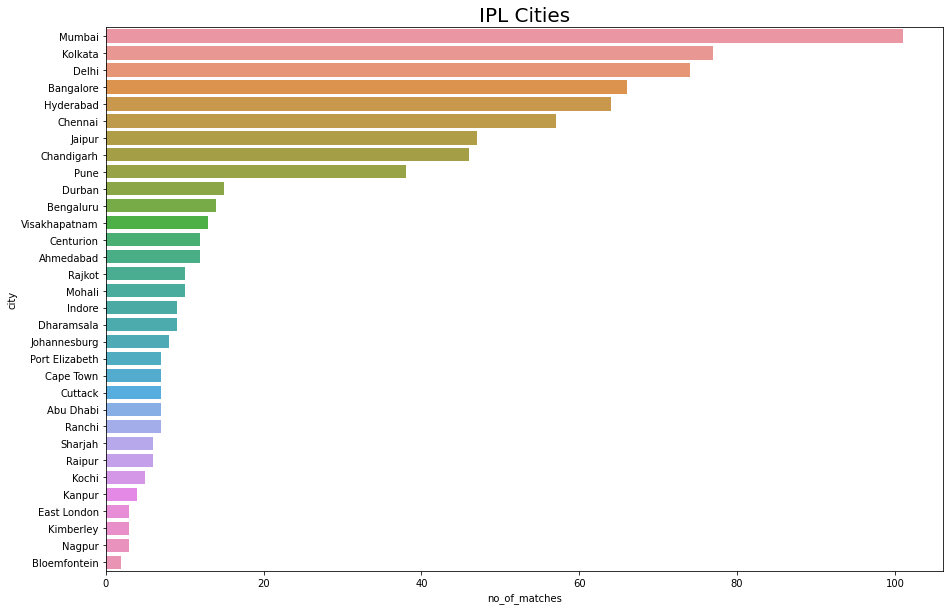

In [63]:
plt.figure(figsize=(15,10))
sns.barplot(x='no_of_matches', y='city', data=city_counts)
plt.title('IPL Cities',fontdict={'fontsize':20})

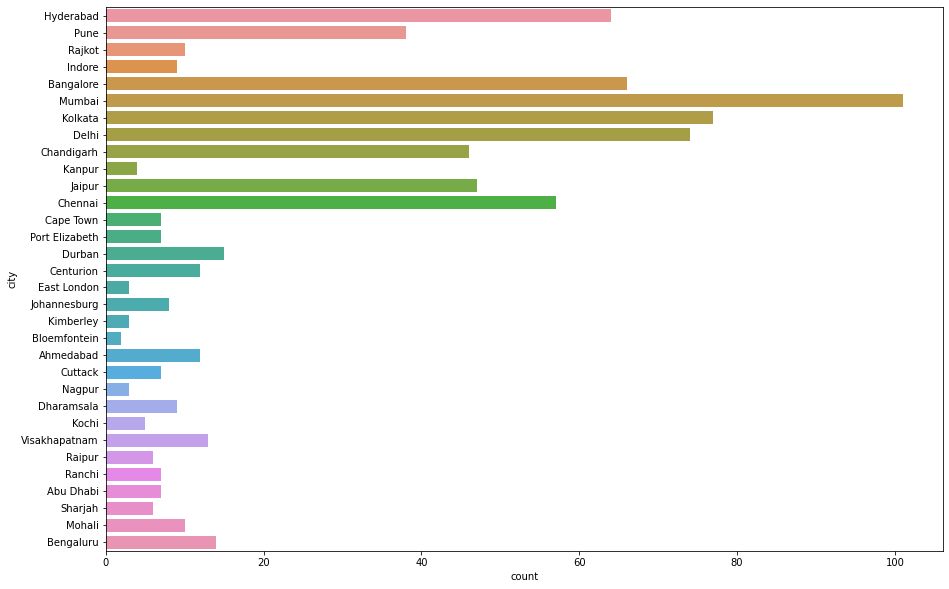

In [72]:
plt.figure(figsize=(15,10))
sns.countplot(y=ipl_matches.city)

### Observations
* Mumbai, Kolkata, Delhi, Bangaluru and Hyderabad are top 5 cities that hosted IPL matches.
* Mumbai hosted maximum number of IPL matches 

### The venue where most of the IPL matches were hosted

In [65]:
venue_counts = ipl_matches['venue'].value_counts().reset_index()
venue_counts.rename(columns={'index':'venue','venue':'no_of_matches'}, inplace = True)
venue_counts

,venue,no_of_matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


Text(0.5, 1.0, 'IPL Venue')

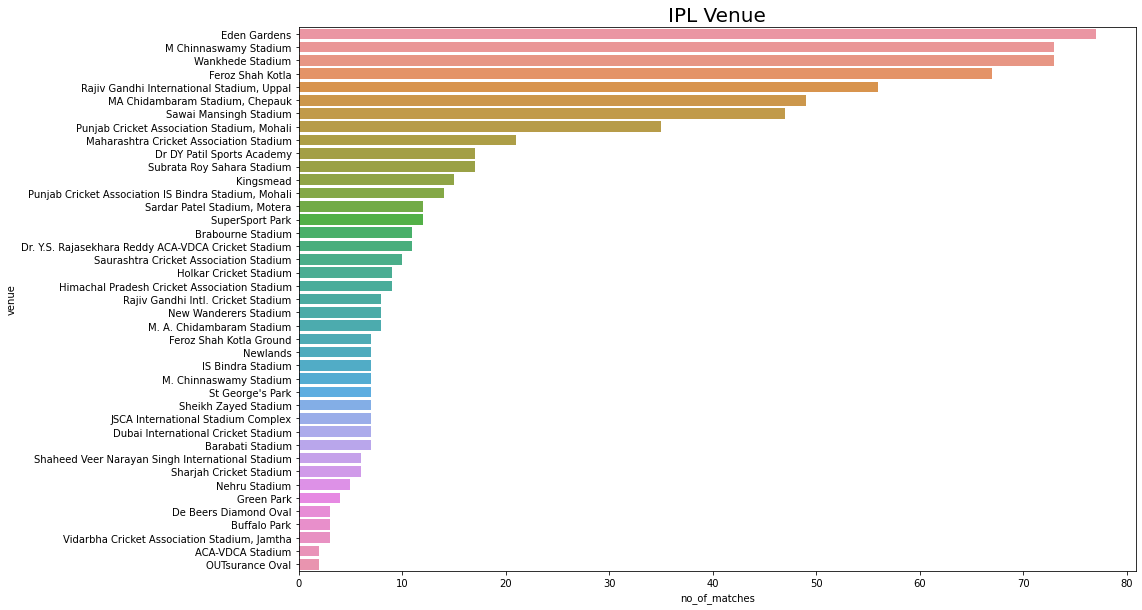

In [67]:
plt.figure(figsize=(15,10))
sns.barplot(x='no_of_matches', y='venue', data=venue_counts)
plt.title('IPL Venue',fontdict={'fontsize':20})

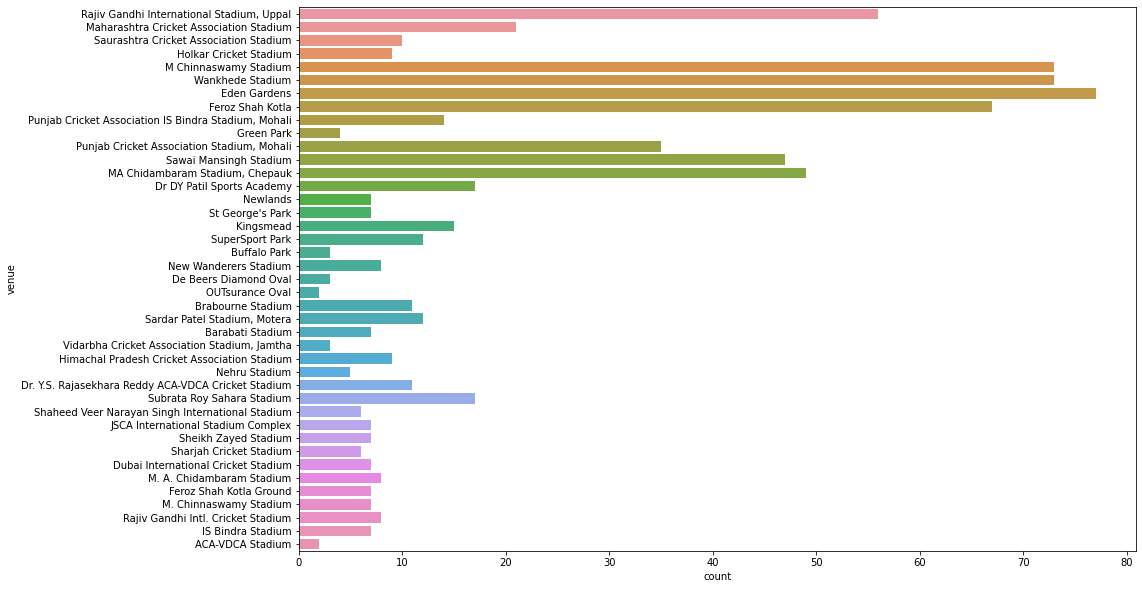

In [71]:
plt.figure(figsize=(15,10))
sns.countplot(y=ipl_matches.venue)